In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

In [2]:
happiness_report = "world_happiness_report_2019_original_file.csv"
region="Country-names-with-region.csv"

In [3]:
happiness_report_df = pd.read_csv(happiness_report)
region_df=pd.read_csv(region)

In [4]:
happiness_report_df.head()

,COU,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,AFG,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
region_df.head()

,Country name,Region
0,Afghanistan,South Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Latin America and Caribbean


In [6]:
happiness_df=happiness_report_df.merge(region_df, on='Country name', how='left')

In [7]:
happiness_df.head()

,COU,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
0,AFG,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
1,AFG,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia


In [8]:
happiness_df.columns

Index(['COU', 'Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trus

In [9]:
happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']]

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,South Asia,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,...,NaN,NaN,0.304368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,South Asia,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,...,NaN,NaN,0.413974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,South Asia,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,...,NaN,NaN,0.596918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,South Asia,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,...,NaN,NaN,0.418629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,South Asia,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,...,NaN,NaN,0.286599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
happy_df = happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup']]
happy_df.head()

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [11]:
report_df= happy_df.rename(columns={'Life Ladder':'Happiness_Score', 'Log GDP per capita':'GDP', 'Freedom to make life choices':'Freedom'})
report_df.head()

,Country name,Region,Year,Happiness_Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [12]:
report_df.dropna()

,Country name,Region,Year,Happiness_Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
36,Argentina,Latin America and Caribbean,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.439,0.368422,0.169295
37,Argentina,Latin America and Caribbean,2010,6.441067,9.836924,0.926799,67.300003,0.730258,-0.121725,0.854695,0.846136,0.210975,0.351856,0.138446,-0.469284,2.107838,0.327250,0.430,0.366742,0.228952
49,Armenia,Commonwealth of Independent States,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.280,0.427577,0.156644
73,Austria,Western Europe,2010,7.302679,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085,1.753248,0.240083,0.303,0.367440,0.300665
108,Bangladesh,South Asia,2010,4.858481,7.800871,0.549398,60.700001,0.659006,-0.010436,0.773530,0.628580,0.292425,0.646873,-0.846942,-0.860694,1.930316,0.397309,0.321,0.450517,0.148750
120,Belarus,Commonwealth of Independent States,2009,5.564131,9.618182,0.907778,62.000000,0.679293,-0.210205,0.675543,0.565597,0.223292,0.548333,-0.529404,-0.977223,1.937372,0.348189,0.277,0.338963,0.356408
133,Belgium,Western Europe,2010,6.853514,10.623421,0.930570,70.800003,0.806930,0.018613,0.697366,0.828259,0.240364,0.336516,1.085667,1.445168,1.603352,0.233946,0.284,0.393781,0.306121
160,Bolivia,Latin America and Caribbean,2009,6.085579,8.571310,0.831320,60.500000,0.778939,-0.030179,0.762605,0.796764,0.372369,0.468150,-0.250256,-0.805518,1.977046,0.324874,0.492,0.417889,0.144024
195,Brazil,Latin America and Caribbean,2009,7.000832,9.521485,0.912818,64.260002,0.766716,-0.065055,0.722515,0.832505,0.274103,0.427179,0.344150,-0.055284,2.236215,0.319421,0.537,0.428937,0.134151
206,Bulgaria,Central and Eastern Europe,2010,3.912276,9.634516,0.843272,65.699997,0.544536,-0.146652,0.940970,0.545824,0.237594,0.365286,0.445788,0.127513,1.968557,0.503174,0.357,0.376450,0.222936


In [13]:
report_df.groupby('Region')['Happiness_Score','GDP'].mean().sort_values(by="Happiness_Score", ascending=False)

,Happiness_Score,GDP
Region,,
North America and ANZ,7.286995,10.650564
Western Europe,6.808758,10.623527
Latin America and Caribbean,6.005871,9.212069
East Asia,5.592699,10.071700
Central and Eastern Europe,5.444195,9.813616
Middle East and North Africa,5.391712,9.748548
Southeast Asia,5.342963,9.128659
Commonwealth of Independent States,5.145158,9.027644
South Asia,4.587340,8.206614


[Text(0, 0.5, 'Happiness_Score'), Text(0.5, 0, 'Country name')]

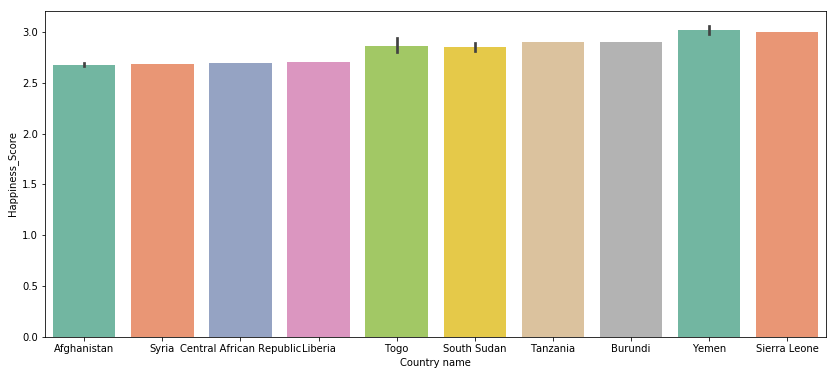

In [14]:
plt.figure(figsize=(14,6))
topCountry=report_df.sort_values(by=['Happiness_Score'],ascending=True).head(15)
ax=sns.barplot(x='Country name',y='Happiness_Score', data=topCountry, palette = 'Set2')
ax.set(xlabel='Country name', ylabel='Happiness_Score')


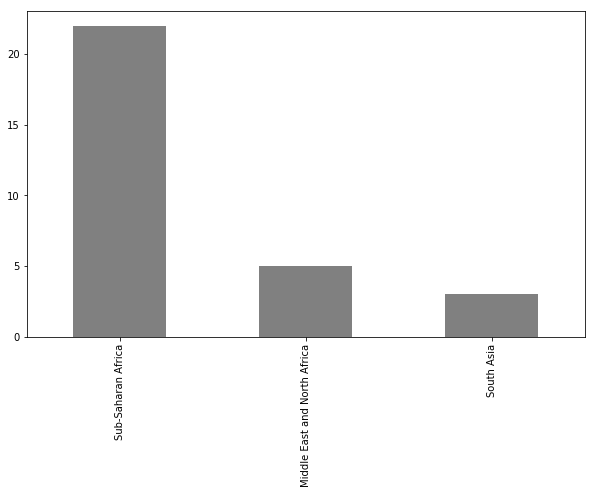

In [15]:
plt.figure(figsize=(10,6))
list = report_df.sort_values(by=['Happiness_Score'],ascending=True)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'grey')

C:\Users\carit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\carit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



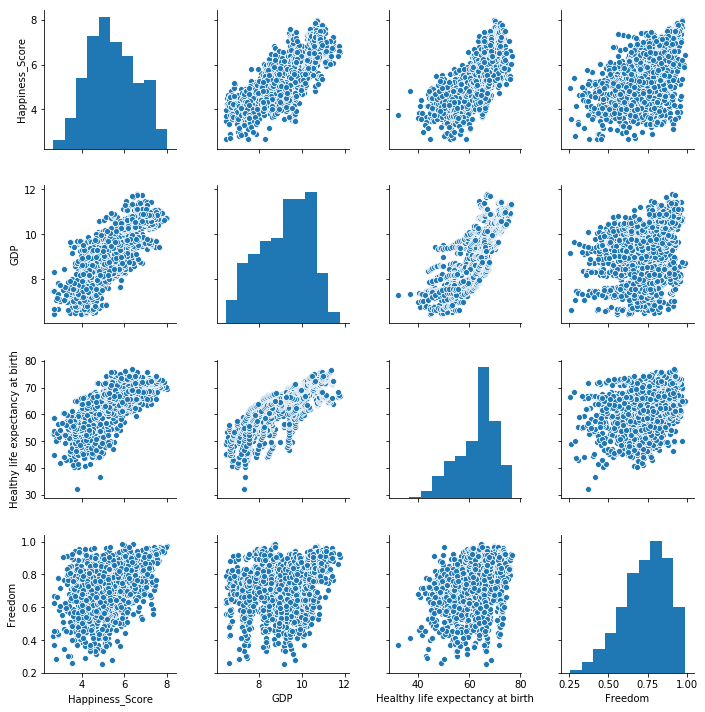

In [17]:
sns.pairplot(report_df[['Happiness_Score','GDP','Healthy life expectancy at birth', 'Freedom']])

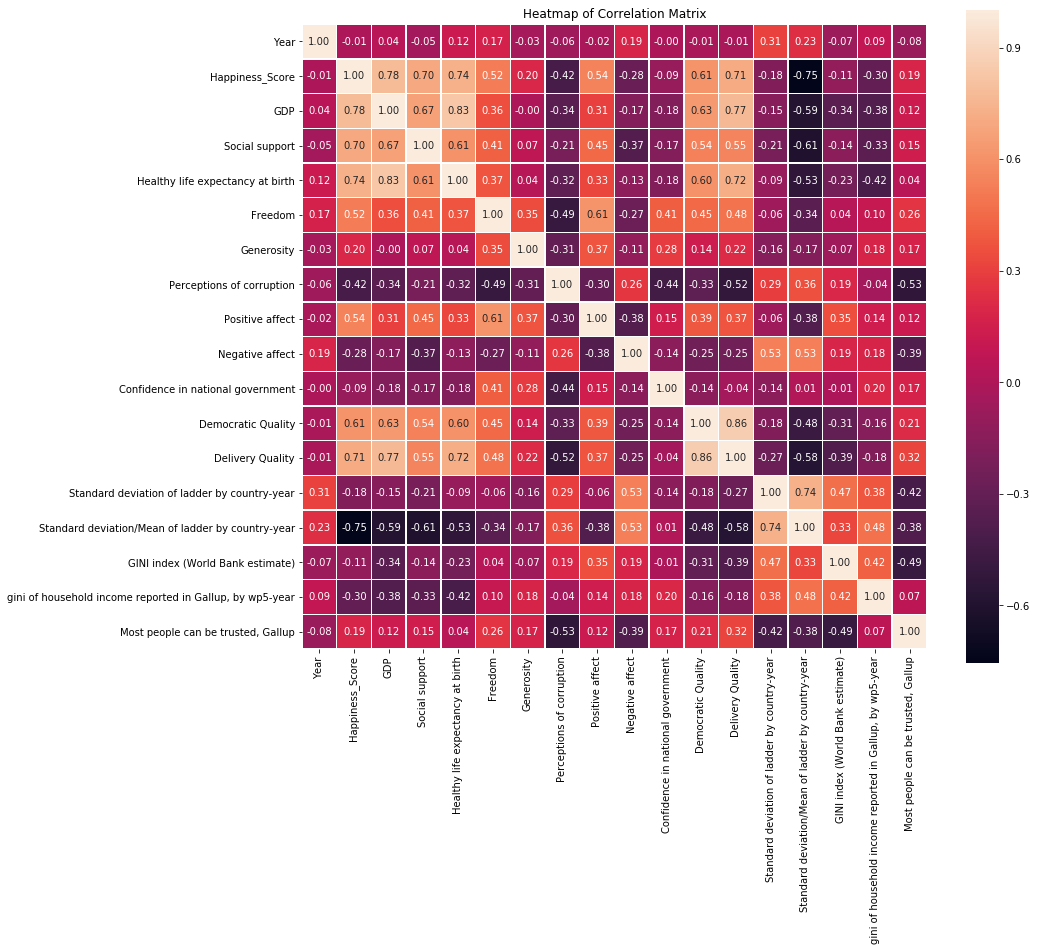

In [18]:
plt.figure(figsize=(14,12))
corr = report_df.drop(['Country name','Region'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 10}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Figure size 864x864 with 0 Axes>

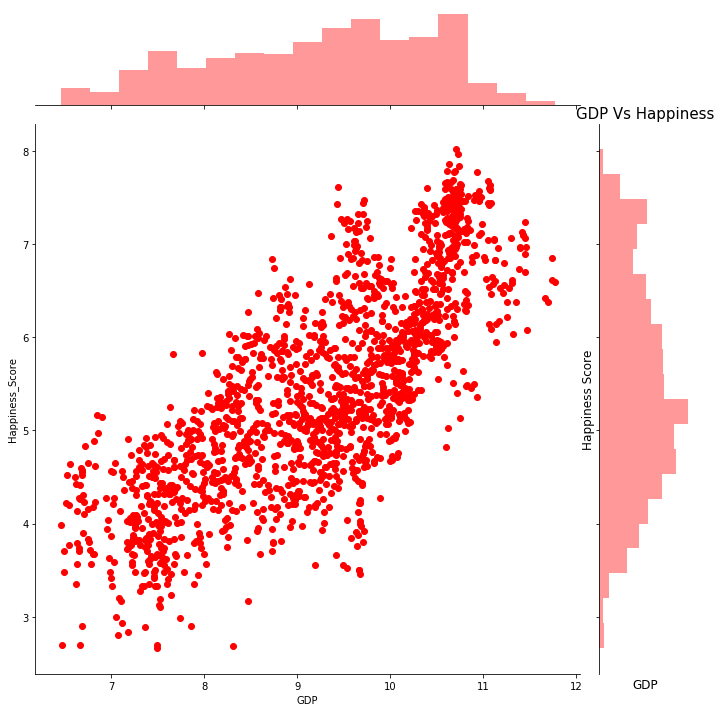

In [19]:
plt.figure(figsize=(12,12))
sns.jointplot(x = 'GDP', y = 'Happiness_Score', data = report_df, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('GDP', fontsize=12)
plt.title('GDP Vs Happiness', fontsize=15)
plt.show()

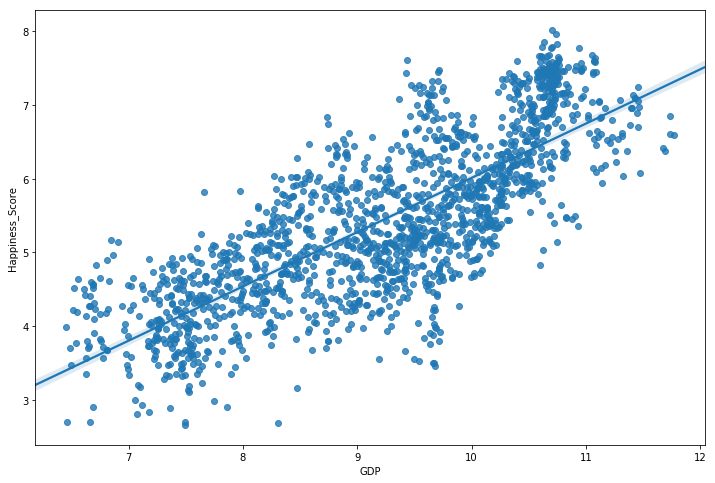

In [37]:
plt.figure(figsize=(12,8))
sns.regplot(x='GDP',y='Happiness_Score' ,data=report_df)
#so there is a linear relation between GDP & Happiness Score
plt.savefig("GDP_happiness_score.svg")

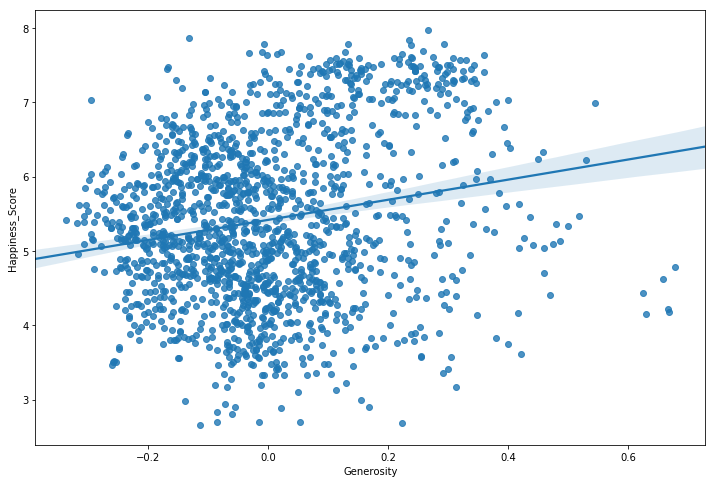

In [38]:
plt.figure(figsize=(12,8))
sns.regplot(x='Generosity',y='Happiness_Score' ,data=report_df)
plt.savefig("generosity_happiness_score.svg")

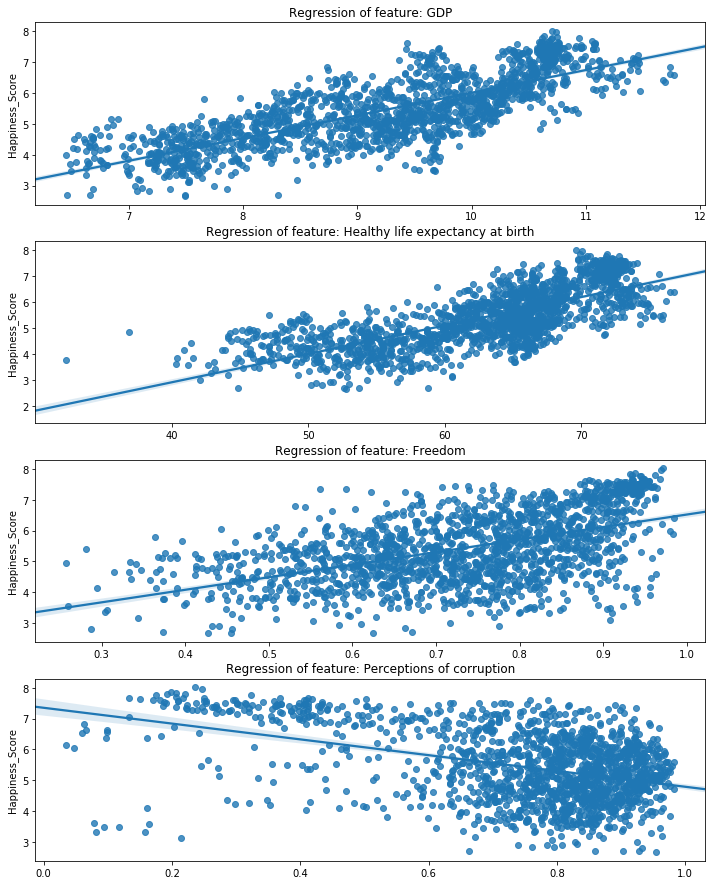

<Figure size 432x288 with 0 Axes>

In [39]:
cols = ['GDP','Healthy life expectancy at birth','Freedom','Perceptions of corruption']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=report_df[cn],y='Happiness_Score' ,data =report_df)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
plt.show()
plt.savefig("regression.svg")

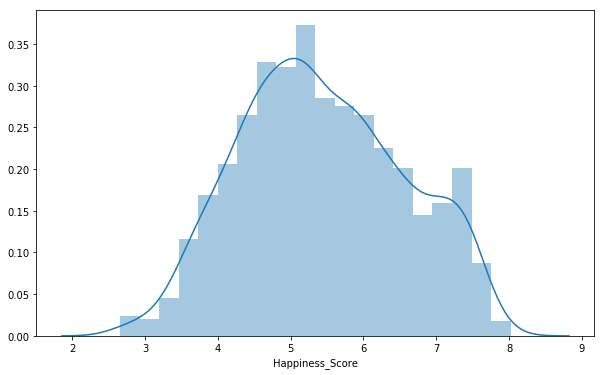

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(report_df['Happiness_Score'],kde=True, bins = 20)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016742D67748>],
      dtype=object)

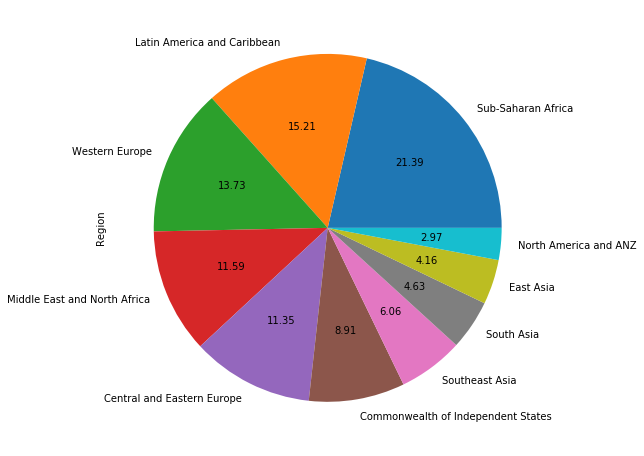

In [24]:
#Percantage on country's regional listing 
report_df['Region'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

In [25]:
dropped_happy = report_df.drop(["Country name", "Region"], axis=1)
dropped_happy.head()

,Year,Happiness_Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [26]:
df = dropped_happy.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
print (df)

      Year  Happiness_Score        GDP  Social support  \
36    2009         6.424133   9.750825        0.918693   
37    2010         6.441067   9.836924        0.926799   
49    2009         4.177582   8.784616        0.680007   
73    2010         7.302679  10.676744        0.914193   
108   2010         4.858481   7.800871        0.549398   
120   2009         5.564131   9.618182        0.907778   
133   2010         6.853514  10.623421        0.930570   
160   2009         6.085579   8.571310        0.831320   
195   2009         7.000832   9.521485        0.912818   
206   2010         3.912276   9.634516        0.843272   
292   2009         6.493686   9.828088        0.831582   
318   2009         6.271605   9.268606        0.885927   
319   2010         6.408113   9.296564        0.892993   
353   2009         7.614929   9.436996        0.899782   
354   2010         7.271054   9.472704        0.915141   
376   2009         6.833477  10.445444        0.811736   
388   2010    

In [27]:
X = df.drop(['Happiness_Score'], axis=1)
y = df['Happiness_Score']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-0.64639313 -0.92623927 -0.14881915 -0.75395983  0.41610426 -0.07389701
  -0.03387716  0.44701691  1.89982945  0.08002705 -0.34391692 -1.01970745
  -0.17743638 -0.36198382  1.12226476 -0.18602211 -0.66420748]
 [-0.64639313  0.47953975 -0.36256788  0.03752034 -0.74048047 -1.0192297
   1.15775167 -1.69325023  0.35269262 -1.27514716  0.46860643 -0.08492386
   0.08896889  0.27062669 -0.41499575  0.91780343 -0.55166962]
 [ 1.02062073  0.3266571   0.36169605  0.31081191  0.41064016 -0.19304085
  -0.44071177  0.82002861 -0.47225021 -0.47173898 -0.37301092 -0.23547946
   0.30837059 -0.46018116  0.6814327  -0.16271928  0.56696632]
 [-0.64639313  1.08539023 -0.57927985  1.16262985 -1.82763994 -1.56987687
   1.11091113 -0.83025671  0.10377614 -0.79178758  0.38226823  0.53402772
  -0.16894359 -0.33053681 -0.64106347 -1.33706    -0.49196258]]


C:\Users\carit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\carit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\carit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [31]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
108,4.858481,5.112386,-0.253905
1436,7.496019,7.381044,0.114975
401,7.770515,7.543124,0.227392
36,6.424133,6.297349,0.126785
499,6.283498,6.455446,-0.171948


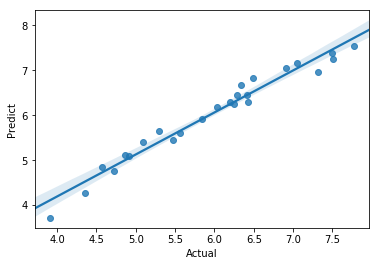

In [32]:
sns.regplot(x='Actual',y='Predict',data=result_lm)

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1734803058803675
MSE: 0.04239854063238842
RMSE: 0.20590905913142438


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

C:\Users\carit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [35]:
result_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_rf.head()

,Actual,Predict,Diff
108,4.858481,4.605002,0.253480
1436,7.496019,7.408682,0.087337
401,7.770515,7.109665,0.660850
36,6.424133,6.079052,0.345081
499,6.283498,6.511482,-0.227984


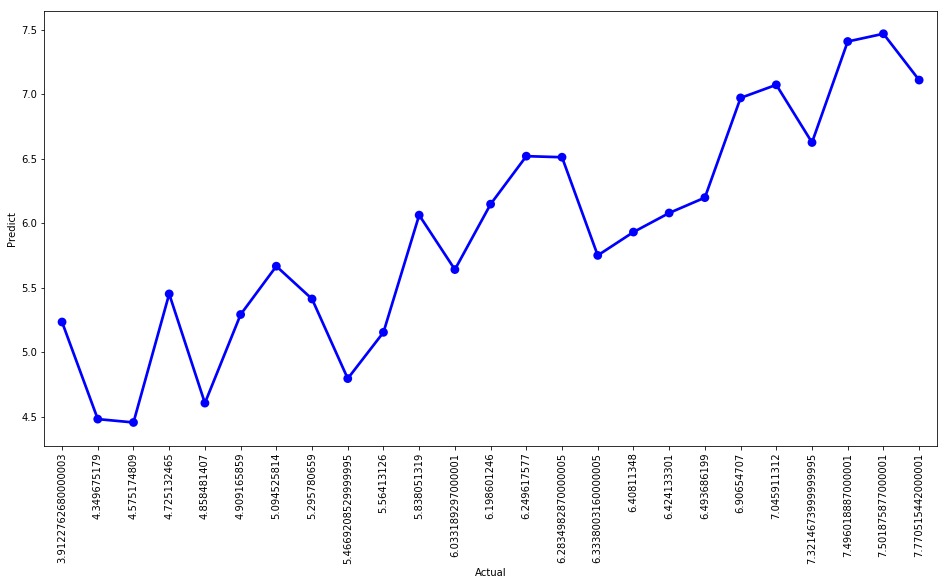

In [36]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="blue")
plt.xticks(rotation = 90)
plt.show()